# Data Loading and Overview

## Import

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer    
from nltk.corpus import wordnet
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\vikak\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\vikak\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package wordnet to

[nltk_data]     C:\Users\vikak\AppData\Roaming\nltk_data...

[nltk_data]   Package wordnet is already up-to-date!

[nltk_data] Downloading package averaged_perceptron_tagger to

[nltk_data]     C:\Users\vikak\AppData\Roaming\nltk_data...

[nltk_data]   Package averaged_perceptron_tagger is already up-to-

[nltk_data]       date!


## Load data

In [4]:
sample_submission = pd.read_csv('E:\\danya\\projects\\disaster_tweets\\sample_submission.csv')
display(sample_submission.head())

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [5]:
df_train = pd.read_csv('E:\\danya\\projects\\disaster_tweets\\train.csv')
df_test = pd.read_csv('E:\\danya\\projects\\disaster_tweets\\test.csv')

print(df_train.shape)
print(df_test.shape)

(7613, 5)

(3263, 4)


## Data overview

In [7]:
display(df_train.head())
display(df_train.info())

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7613 entries, 0 to 7612

Data columns (total 5 columns):

 #   Column    Non-Null Count  Dtype 

---  ------    --------------  ----- 

 0   id        7613 non-null   int64 

 1   keyword   7552 non-null   object

 2   location  5080 non-null   object

 3   text      7613 non-null   object

 4   target    7613 non-null   int64 

dtypes: int64(2), object(3)

memory usage: 297.5+ KB


None

E:\danya\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


Text(0, 0.5, 'samples')

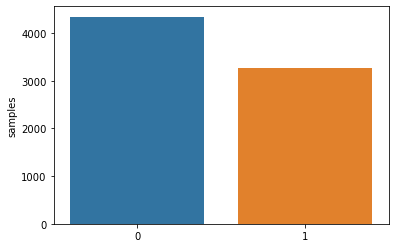

In [8]:
x = df_train['target'].value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

# EDA

## Metafeatures

### Extracting metafeatures

In [6]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
english_stops = stopwords.words('english')
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in english_stops]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in english_stops]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

### Visualizing metafeatures distribution

E:\danya\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

E:\danya\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

E:\danya\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for h

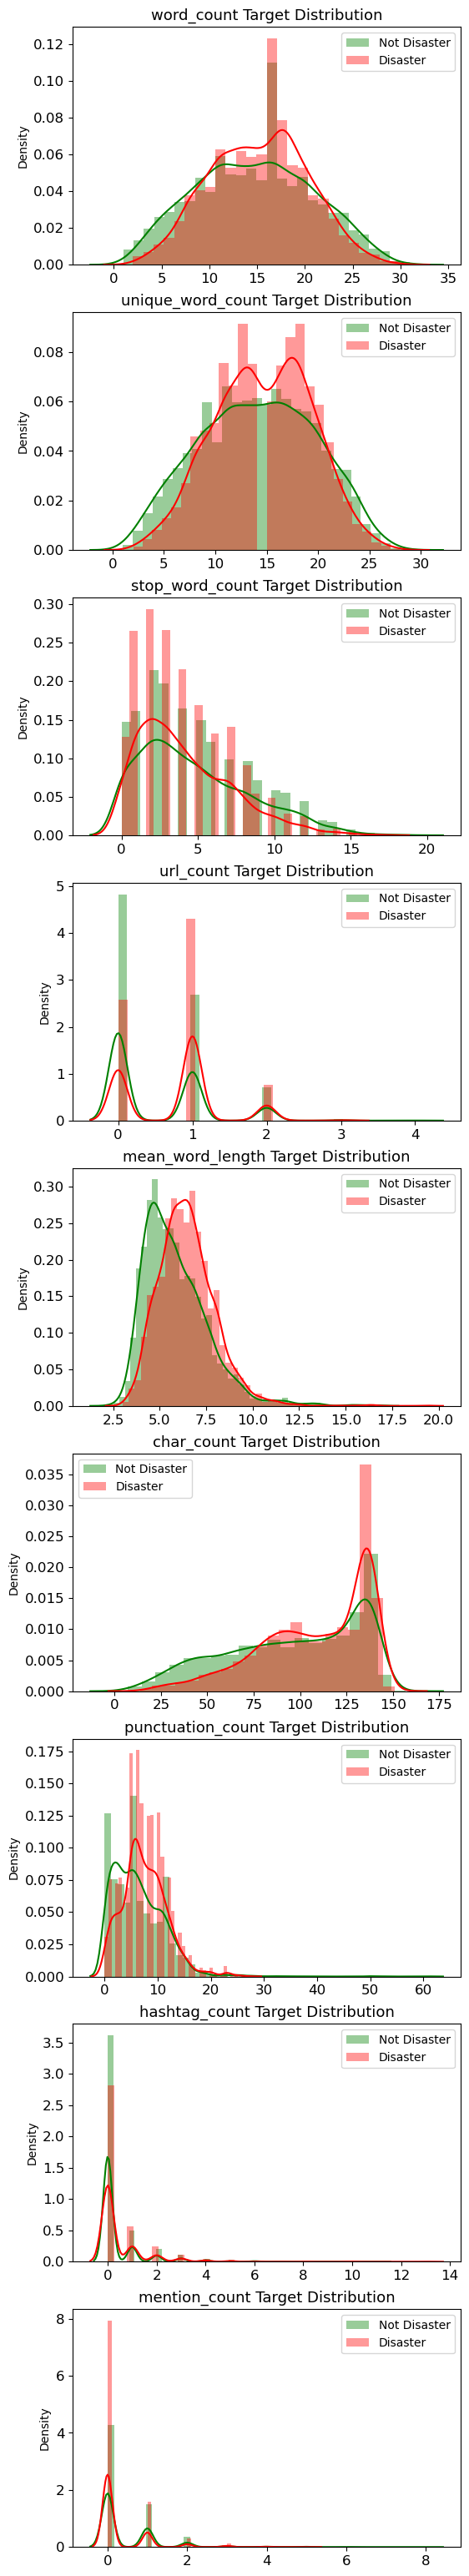

In [10]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = df_train['target'] == 1

fig, axes = plt.subplots(nrows=len(METAFEATURES), figsize=(6, 40), dpi=100)
    
for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i], color='red')
    
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()   
    axes[i].set_title(f'{feature} Target Distribution', fontsize=13)

plt.show()

# Cleaning Data

In [7]:
all_data = pd.concat([df_train, df_test])
all_data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 10876 entries, 0 to 3262

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   id                 10876 non-null  int64  

 1   keyword            10789 non-null  object 

 2   location           7238 non-null   object 

 3   text               10876 non-null  object 

 4   target             7613 non-null   float64

 5   word_count         10876 non-null  int64  

 6   unique_word_count  10876 non-null  int64  

 7   stop_word_count    10876 non-null  int64  

 8   url_count          10876 non-null  int64  

 9   mean_word_length   10876 non-null  float64

 10  char_count         10876 non-null  int64  

 11  punctuation_count  10876 non-null  int64  

 12  hashtag_count      10876 non-null  int64  

 13  mention_count      10876 non-null  int64  

dtypes: float64(2), int64(9), object(3)

memory usage: 1.2+ MB


In [8]:
import re

# removing URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

all_data['text'] = all_data['text'].apply(lambda x : remove_URL(x))

# removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

all_data['text'] = all_data['text'].apply(lambda x : remove_html(x))

# removing emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

all_data['text'] = all_data['text'].apply(lambda x : remove_emoji(x))

# removing punctuation
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

all_data['text'] = all_data['text'].apply(lambda x : remove_punct(x))

In [ ]:
# !pip install pyspellchecker

In [ ]:
# from spellchecker import SpellChecker

# spell = SpellChecker()
# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)
        
# text = "corect me plese"
# correct_spellings(text)

# Modeling

In [ ]:
train_cleaned = all_data[all_data['id'].isin(df_train['id'])]
test_cleaned = all_data[all_data['id'].isin(df_test['id'])]

print(train_cleaned.shape)
print(train_cleaned['text'][train_cleaned['text'].index[0]])
print(test_cleaned.shape)
print(test_cleaned['text'][test_cleaned['text'].index[0]])

(7613, 14)

Our Deeds are the Reason of this earthquake May ALLAH Forgive us all

(3263, 14)

Just happened a terrible car crash


### Train-test split

In [ ]:
y = train_cleaned['target']
X = train_cleaned.drop(['target', 'id', 'keyword', 'location'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_val.shape)

(5709, 10)

(1904, 10)


### Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizers = {'Count': [CountVectorizer(stop_words='english')], 'TF-IDF': [TfidfVectorizer(stop_words="english")]}

for name, vectorizer in vectorizers.items():
    train_features = vectorizer[0].fit_transform(X_train['text'])
    vectorizers[name].append(train_features)
    val_features = vectorizer[0].transform(X_val['text'])
    vectorizers[name].append(val_features)
    print(name)
    print(train_features.shape)
    print(val_features.shape)


Count

(5709, 14584)

(1904, 14584)

TF-IDF

(5709, 14584)

(1904, 14584)


Adding averaged features

In [ ]:
df_train = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
df_val = pd.DataFrame(count_val.A, columns=count_vectorizer.get_feature_names())
print(df_train.shape)
print(df_val.shape)

(5709, 14584)



(1904, 14584)


In [ ]:
avg_features_train = X_train.loc[:, X_train.columns != 'text']
avg_features_train.reset_index(drop=True, inplace=True)
df_train = df_train.join(avg_features_train)

print(avg_features_train.shape)
print(avg_features_train.columns)
print(df_train.shape)

avg_features_val = X_val.loc[:, X_val.columns != 'text']
avg_features_val.reset_index(drop=True, inplace=True)
df_val = df_val.join(avg_features_val)
print(avg_features_val.shape)
print(avg_features_val.columns)
print(df_val.shape)

(5709, 9)



Index(['word_count', 'unique_word_count', 'stop_word_count', 'url_count',



       'mean_word_length', 'char_count', 'punctuation_count', 'hashtag_count',



       'mention_count'],



      dtype='object')


In [ ]:
vectorizers

{'Count': [CountVectorizer(stop_words='english'),
  <5709x14584 sparse matrix of type '<class 'numpy.int64'>'
  	with 48598 stored elements in Compressed Sparse Row format>,
  <1904x14584 sparse matrix of type '<class 'numpy.int64'>'
  	with 13014 stored elements in Compressed Sparse Row format>],
 'TF-IDF': [TfidfVectorizer(stop_words='english'),
  <5709x14584 sparse matrix of type '<class 'numpy.float64'>'
  	with 48598 stored elements in Compressed Sparse Row format>,
  <1904x14584 sparse matrix of type '<class 'numpy.float64'>'
  	with 13014 stored elements in Compressed Sparse Row format>]}

### Base estimators

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

In [ ]:
vectorizer = vectorizers['Count']

## Linear, SVM, Naive Bayes 

In [ ]:
# Estimators with parameters
nb = MultinomialNB()
nb_param = {'alpha': [2, 3, 4]}

logreg = LogisticRegression()
logreg_param = {'C': [0.2, 0.4, 0.6]}

ridge = RidgeClassifier()
ridge_param = {'alpha': [6, 8, 12]}

svc = LinearSVC()
svc_param = {'C': [0.03, 0.08, 0.13]}

estimators = {'Naive Bayes': [nb, nb_param], 'Logistic Regression': [logreg, logreg_param], 'Ridge': [ridge, ridge_param], 
              'Linear SVM': [svc, svc_param]}

# Training
for name_estimator, estimator in estimators.items():
    print(name_estimator)
    print('----------------')
    grid_estimator = GridSearchCV(estimator=estimator[0], param_grid=estimator[1], cv=5, scoring='f1', refit=True, return_train_score=True)
    grid_estimator.fit(vectorizer[1], y_train)
    # Read the cv_results property into a dataframe & print it out
    cv_results_df = pd.DataFrame(grid_estimator.cv_results_)
    print(cv_results_df[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']])
    print('Best params: {}'.format(grid_estimator.best_params_))
    print('Best score: {}'.format(grid_estimator.best_score_))       
    print('===================================================')
    

Naive Bayes

----------------

         params  mean_test_score  mean_train_score  rank_test_score

0  {'alpha': 2}         0.741437          0.891370                1

1  {'alpha': 3}         0.737564          0.877675                2

2  {'alpha': 4}         0.736738          0.867482                3

Best params: {'alpha': 2}

Best score: 0.7414367282126105


Logistic Regression

----------------

       params  mean_test_score  mean_train_score  rank_test_score

0  {'C': 0.2}         0.728081          0.880637                3

1  {'C': 0.4}         0.731848          0.924270                1

2  {'C': 0.6}         0.731695          0.943575                2

Best params: {'C': 0.4}

Best score: 0.7318484561322427


Ridge

----------------

          params  mean_test_score  mean_train_score  rank_test_score

0   {'alpha': 6}         0.726370          0.957746                2

1   {'alpha': 8}         0.726160          0.946648                3

2  {'alpha': 12}         0.727163

### Ensembles

In [ ]:
nb = MultinomialNB(alpha=2)
logreg = LogisticRegression(C=0.4)
ridge = RidgeClassifier(alpha=10)
svc = LinearSVC(C=0.05)

In [ ]:
# estimators = [('Naive Bayes', nb), ('Logistic Regression', logreg), ('Ridge', ridge), ('Linear SVM', svc)]
estimators = [('Naive Bayes', nb), ('Ridge', ridge), ('Logistic Regression', logreg)]
final_estimator = svc

stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_ensemble.fit(vectorizer[1], y_train)
predictions = stacking_ensemble.predict(vectorizer[2])

f1 = metrics.f1_score(y_val, predictions)
print('f1 = {:.3f}'.format(f1))

f1 = 0.756


## Tree-based

In [ ]:
dtc = DecisionTreeClassifier(random_state=2, criterion='entropy', splitter='random')
dtc_param = {'min_samples_leaf': [4, 5, 6], 'min_samples_split': [2, 3, 4]}

grid_estimator = GridSearchCV(estimator=dtc, param_grid=dtc_param, cv=5, scoring='f1', refit=True, return_train_score=True)
grid_estimator.fit(vectorizer[1], y_train)

cv_results_df = pd.DataFrame(grid_estimator.cv_results_)
print(cv_results_df[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']])
print('Best params: {}'.format(grid_estimator.best_params_))
print('Best score: {}'.format(grid_estimator.best_score_))

                                            params  mean_test_score  \

0  {'min_samples_leaf': 4, 'min_samples_split': 2}         0.709377   

1  {'min_samples_leaf': 4, 'min_samples_split': 3}         0.709377   

2  {'min_samples_leaf': 4, 'min_samples_split': 4}         0.709377   

3  {'min_samples_leaf': 5, 'min_samples_split': 2}         0.706772   

4  {'min_samples_leaf': 5, 'min_samples_split': 3}         0.706772   

5  {'min_samples_leaf': 5, 'min_samples_split': 4}         0.706772   

6  {'min_samples_leaf': 6, 'min_samples_split': 2}         0.709239   

7  {'min_samples_leaf': 6, 'min_samples_split': 3}         0.709239   

8  {'min_samples_leaf': 6, 'min_samples_split': 4}         0.709239   



   mean_train_score  rank_test_score  

0          0.791897                1  

1          0.791897                1  

2          0.791897                1  

3          0.782118                7  

4          0.782118                7  

5          0.782118                7  

In [ ]:
rfc = RandomForestClassifier(random_state=2, min_samples_leaf=4)
rfc_param = {'n_estimators': [10, 30, 90]}

grid_estimator = GridSearchCV(estimator=rfc, param_grid=rfc_param, cv=5, scoring='f1', refit=True, return_train_score=True)
grid_estimator.fit(vectorizer[1], y_train)

cv_results_df = pd.DataFrame(grid_estimator.cv_results_)
print(cv_results_df[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']])
print('Best params: {}'.format(grid_estimator.best_params_))
print('Best score: {}'.format(grid_estimator.best_score_))

                 params  mean_test_score  mean_train_score  rank_test_score

0  {'n_estimators': 10}         0.702067          0.763201                3

1  {'n_estimators': 30}         0.707717          0.770849                2

2  {'n_estimators': 90}         0.711604          0.777437                1

Best params: {'n_estimators': 90}

Best score: 0.7116035928710628


In [ ]:
grb = GradientBoostingClassifier(random_state=2, learning_rate=0.3, n_estimators=300, min_samples_leaf=4)
grb_param = {'subsample': [0.25, 0.5, 0.75, 1.0]}

grid_estimator = GridSearchCV(estimator=grb, param_grid=grb_param, cv=5, scoring='f1', refit=True, return_train_score=True)
grid_estimator.fit(vectorizer[1], y_train)

cv_results_df = pd.DataFrame(grid_estimator.cv_results_)
print(cv_results_df[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']])
print('Best params: {}'.format(grid_estimator.best_params_))
print('Best score: {}'.format(grid_estimator.best_score_))

                params  mean_test_score  mean_train_score  rank_test_score

0  {'subsample': 0.25}         0.698101          0.792018                4

1   {'subsample': 0.5}         0.709245          0.819659                3

2  {'subsample': 0.75}         0.719659          0.833609                2

3   {'subsample': 1.0}         0.720429          0.834208                1

Best params: {'subsample': 1.0}

Best score: 0.7204285936014366


### Ensembles

In [ ]:
dtc = DecisionTreeClassifier(random_state=2, criterion='entropy', splitter='random', min_samples_leaf=4)
rfc = RandomForestClassifier(random_state=2, criterion='entropy', n_estimators=100, min_samples_leaf=4)
grb = GradientBoostingClassifier(random_state=2, learning_rate=0.3, n_estimators=300, min_samples_leaf=4)

In [ ]:
# estimators = [('Decision Tree', dtc), ('Random Forest', rfc), ('Gradient Boosting', grb)]
estimators = [('Random Forest', rfc), ('Gradient Boosting', grb)]
final_estimator = dtc

stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_ensemble.fit(vectorizer[1], y_train)
predictions = stacking_ensemble.predict(vectorizer[2])

f1 = metrics.f1_score(y_val, predictions)
print('f1 = {:.3f}'.format(f1))

f1 = 0.719


## Mixed ensembles

In [ ]:
nb = MultinomialNB(alpha=2)
logreg = LogisticRegression(C=0.4)
ridge = RidgeClassifier(alpha=10)
svc = LinearSVC(C=0.05)

dtc = DecisionTreeClassifier(random_state=2, criterion='entropy', splitter='random', min_samples_leaf=4)
rfc = RandomForestClassifier(random_state=2, criterion='entropy', n_estimators=100, min_samples_leaf=4)
grb = GradientBoostingClassifier(random_state=2, learning_rate=0.3, n_estimators=300, min_samples_leaf=4)

In [ ]:
# estimators = [('Naive Bayes', nb), ('Logistic Regression', logreg), ('Ridge', ridge), ('Linear SVM', svc)]
# estimators = [('Decision Tree', dtc), ('Random Forest', rfc), ('Gradient Boosting', grb)]
estimators = [('Naive Bayes', nb), ('Linear SVM', svc), ('Ridge', ridge), ('Decision Tree', dtc)]
final_estimator = logreg

stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_ensemble.fit(vectorizer[1], y_train)
predictions = stacking_ensemble.predict(vectorizer[2])

f1 = metrics.f1_score(y_val, predictions)
print('f1 = {:.3f}'.format(f1))

f1 = 0.768


## Neural networks

In [9]:
stop = set(stopwords.words('english'))
def create_corpus(df):
    corpus = []
    for tweet in df['text']:
        words = [word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus = create_corpus(all_data)

In [10]:
print(len(corpus))
print(corpus[0:3])
sequence_length = [len(sequence) for sequence in corpus]
print(max(sequence_length))

10876

[['our', 'deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'], ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'], ['all', 'residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'no', 'evacuation', 'shelter', 'place', 'orders', 'expected']]

28


In [11]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

MAX_LEN = 30
tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')

word_index = tokenizer_obj.word_index
print('Number of unique words:', len(word_index))

Number of unique words: 20342


In [13]:
embedding_dict={}

with open('E:\\danya\\projects\\disaster_tweets\\glove.6B.100d.txt', 'r', encoding='utf8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [14]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word, i in word_index.items():
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

In [15]:
from keras import backend as K

def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [21]:
from keras.initializers import Constant

model = Sequential()

num_words = len(word_index) + 1
embedding = Embedding(input_dim=num_words, output_dim=100, embeddings_initializer=Constant(embedding_matrix),
                      input_length=MAX_LEN, trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimzer = Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy', optimizer=optimzer, metrics=['accuracy', f1_score])
model.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 embedding_1 (Embedding)     (None, 30, 100)           2034300   

                                                                 

 spatial_dropout1d_1 (Spatia  (None, 30, 100)          0         

 lDropout1D)                                                     

                                                                 

 lstm_1 (LSTM)               (None, 64)                42240     

                                                                 

 dense_1 (Dense)             (None, 1)                 65        

                                                                 


Total params: 2,076,605

Trainable params: 42,305

Non-trainable params: 2,034,300

_________________________________________________________________


In [18]:
train = tweet_pad[:df_train.shape[0]]
test = tweet_pad[df_train.shape[0]:]

X_train, X_test, y_train, y_test = train_test_split(train, df_train['target'].values, test_size=0.25, random_state=42)
print('Shape of train', X_train.shape)
print("Shape of Validation ", X_test.shape)

Shape of train (5709, 30)

Shape of Validation  (1904, 30)


In [22]:
model.fit(X_train, y_train, batch_size=20, epochs=20, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20

286/286 - 18s - loss: 0.6925 - accuracy: 0.5598 - f1_score: 0.0443 - val_loss: 0.6914 - val_accuracy: 0.5725 - val_f1_score: 0.0000e+00 - 18s/epoch - 63ms/step

Epoch 2/20

286/286 - 11s - loss: 0.6904 - accuracy: 0.5693 - f1_score: 0.0013 - val_loss: 0.6891 - val_accuracy: 0.5730 - val_f1_score: 0.0000e+00 - 11s/epoch - 38ms/step

Epoch 3/20

286/286 - 11s - loss: 0.6876 - accuracy: 0.5696 - f1_score: 7.7700e-04 - val_loss: 0.6853 - val_accuracy: 0.5730 - val_f1_score: 0.0000e+00 - 11s/epoch - 39ms/step

Epoch 4/20

286/286 - 11s - loss: 0.6820 - accuracy: 0.5695 - f1_score: 0.0000e+00 - val_loss: 0.6746 - val_accuracy: 0.5730 - val_f1_score: 0.0000e+00 - 11s/epoch - 37ms/step

Epoch 5/20

286/286 - 11s - loss: 0.6636 - accuracy: 0.5787 - f1_score: 0.0412 - val_loss: 0.6375 - val_accuracy: 0.6040 - val_f1_score: 0.1208 - 11s/epoch - 39ms/step

Epoch 6/20

286/286 - 12s - loss: 0.6230 - accuracy: 0.6674 - f1_score: 0.3540 - val_loss: 0.5818 - val_accuracy: 0.7511 - val_f1_s